In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading of the files
food = pd.read_csv("food.csv")
ratings = pd.read_csv("ratings.csv")

In [ ]:
food.shape

(309, 5)

In [ ]:
ratings.shape

(512, 3)

In [ ]:
food.head(5)

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [ ]:
ratings.head(5)

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


In [ ]:
#done pivot table --> does groupby on col and specifies agg matrix on cols
dataset = ratings.pivot_table(index='Food_ID', columns='User_ID', values='Rating')
dataset.fillna(0, inplace=True)

In [ ]:
dataset
#User Item Matrix

User_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Food_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



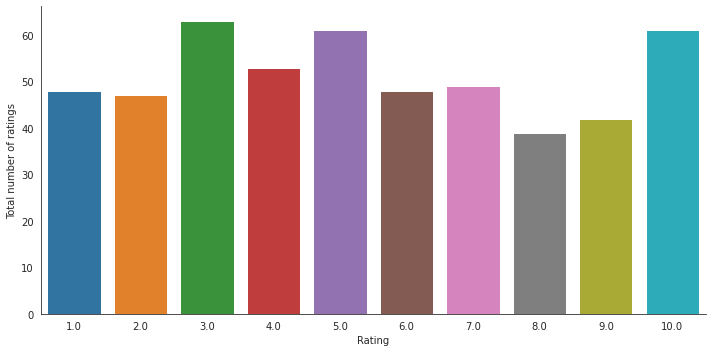

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:
dataset.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
User_ID,,,,,,,
1.0,0.051780,0.459995,0.000000,0.000000,0.000000,0.000000,5.000000
2.0,0.084142,0.821411,0.000000,0.000000,0.000000,0.000000,9.000000
3.0,0.155340,1.069870,0.000000,0.000000,0.000000,0.000000,10.000000
4.0,0.090615,0.775984,0.000000,0.000000,0.000000,0.000000,10.000000
5.0,0.135922,1.038686,0.000000,0.000000,0.000000,0.000000,10.000000
6.0,0.064725,0.604919,0.000000,0.000000,0.000000,0.000000,7.000000
7.0,0.145631,1.099655,0.000000,0.000000,0.000000,0.000000,10.000000
8.0,0.145631,0.977750,0.000000,0.000000,0.000000,0.000000,9.000000
9.0,0.093851,0.630085,0.000000,0.000000,0.000000,0.000000,6.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



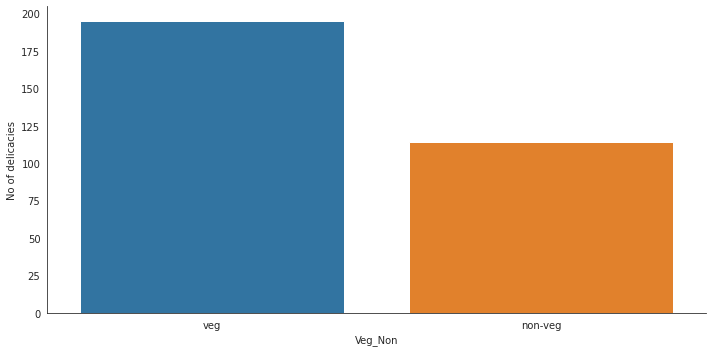

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("Veg_Non", data=food, aspect=2.0,kind='count')
    g.set_ylabels("No of delicacies")

In [ ]:
import plotly.express as px
fig = px.scatter(ratings, x="Rating", y="Food_ID", color=ratings['Rating'],  color_continuous_scale='Reds')
fig.update_layout(legend_title_text='Rating')

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size = 0.3, random_state=0)

In [ ]:
train_data.shape

(216, 100)

In [ ]:
test_data.shape

(93, 100)

In [ ]:
dataset.shape

(309, 100)

In [ ]:
#main recommendation function
def food_recommendation(Food_Name):
    n = 10
    FoodList = food[food['Name'].str.contains(Food_Name)]
    if len(FoodList):
        Foodi= FoodList.iloc[0]['Food_ID']
        Foodi = dataset[dataset['Food_ID'] == Foodi].index[0]
        distances , indices = model.kneighbors(csr_dataset[Foodi],n_neighbors=n+1)
        Food_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        Recommendations = []
        for val in Food_indices:
            Foodi = dataset.iloc[val[0]]['Food_ID']
            i = food[food['Food_ID'] == Foodi].index
            Recommendations.append({'Name':food.iloc[i]['Name'].values[0],'Distance':val[1]})

        import pandas as pd
        df = pd.DataFrame(Recommendations,index=range(1,n+1))
        return df['Name']
    else:
        return "No Similar Foods."

In [ ]:
#remove sparsity
csr_dataset = csr_matrix(dataset.values)
dataset.reset_index(inplace = True)

In [ ]:
#using algorithm
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model.fit(csr_dataset)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
food_recommendation('dates and nuts ladoo')

1     lamb and chargrilled bell pepper soup
2                                  red rice
3                               egg paratha
4                      dahi lasooni chicken
5                   andhra crab meat masala
6          white chocolate and lemon pastry
7                            chicken dragon
8                    lemon poppy seed cake 
9                   steam bunny chicken bao
10                       cashew nut cookies
Name: Name, dtype: object

In [ ]:
food_recommendation('andhra crab meat masala')

1     red wine braised mushroom flatbread
2                 eggless coffee cupcakes
3                        sugar free modak
4      watermelon and strawberry smoothie
5                 baked raw banana samosa
6                 steam bunny chicken bao
7                      cashew nut cookies
8                    dates and nuts ladoo
9                         detox haldi tea
10                        tricolour salad
Name: Name, dtype: object

In [ ]:
#SVD (SINGLE VALUE DECOMPOSITION) ALGO
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(dataset, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = dataset.columns)
preds_df.head()
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):

    user_idx = userID-1 # index starts at 0

    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predic])

In [ ]:
preds_df

User_ID,Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0,1.000293,-0.074091,-0.081548,0.010677,-0.264516,-0.018403,-0.167383,0.274540,0.044667,-0.159877,...,-0.017704,1.335682,-0.065999,-0.140571,-0.436414,0.010626,0.061511,-2.005801,0.081840,-0.178022
1,2.000376,-0.000028,0.028765,0.017852,-0.087785,0.044360,-0.053894,0.117367,-0.000772,1.908360,...,-0.060275,0.299844,0.015050,0.045368,2.080151,-0.047045,-0.272946,-0.204976,0.019812,-0.017268
2,3.001104,0.001004,0.068917,-0.066760,0.085260,-0.176869,0.056038,0.125075,-0.124125,-0.064560,...,0.317528,-0.135672,-0.185945,0.083618,-0.575309,-0.013156,-0.176925,-0.314296,0.057609,-0.012272
3,4.000490,-0.085995,-0.853134,-0.048015,-0.053295,0.071621,-0.004756,-0.053315,0.044943,-0.140828,...,-0.020935,0.082861,-0.128239,-0.046732,-0.029637,0.163787,-0.680480,-0.032711,-0.118967,-0.063019
4,5.000552,0.012620,0.075341,-0.003147,0.252867,-0.011743,-0.133777,-0.121278,-0.018227,0.129783,...,-0.067214,-0.254763,-0.295242,1.786504,0.018223,-0.038796,-0.287038,6.789175,-0.142820,0.004497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305.002804,0.006300,0.014791,-0.086686,-0.167119,-0.056848,0.015465,0.087389,-0.041736,-0.323115,...,-0.001376,-0.110738,-0.137380,-0.108159,-0.443815,0.065127,-0.210373,-0.118452,0.213840,-0.120685
305,305.999851,0.055215,-0.060125,0.035320,0.016497,0.028336,-0.034185,0.575921,0.024267,0.001990,...,0.138151,-0.590600,0.151295,0.122525,0.029632,-0.071343,-0.225136,-0.190270,0.036331,0.095306
306,306.998401,-0.031013,-0.008648,0.043796,0.043108,0.009539,0.010285,-0.066707,0.012684,0.092845,...,0.151947,0.182753,0.018439,0.108228,0.077517,0.010790,0.082781,-0.205620,-0.089956,-0.000160
307,307.999129,0.197721,0.017939,0.035006,0.181108,0.059182,0.014624,0.141653,-0.075649,0.072618,...,0.142725,0.165093,-0.023770,0.116118,0.298850,0.054242,1.736195,-0.241612,0.115113,-0.087988


In [ ]:
rmse_df

,Avg_actual_ratings,Avg_predicted_ratings,item_index
User_ID,,,
1.0,0.060185,0.032258,0
2.0,0.120370,0.000000,1
3.0,0.166667,0.129032,2
4.0,0.125000,0.010753,3
5.0,0.129630,0.150538,4
...,...,...,...
96.0,0.171296,0.064516,95
97.0,0.101852,0.118280,96
98.0,0.101852,0.086022,97


In [ ]:
rmse_df = pd.concat([train_data.mean(), test_data.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()


(100, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
User_ID,,,
1.0,0.060185,0.032258,0
2.0,0.120370,0.000000,1
3.0,0.166667,0.129032,2
4.0,0.125000,0.010753,3
5.0,0.129630,0.150538,4


In [ ]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE KNN Model = {} \n'.format(RMSE))


RMSE KNN Model = 0.09769 

